In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [34]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 24\customer_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [35]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 5880
Total de variables disponibles (columnas) = 21 
Columnas que cuentan con un valor nulo -
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [36]:
df2['Churn'].value_counts()

Churn
No     2982
Yes    2898
Name: count, dtype: int64

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [38]:
# Remplazar por 0 y 1

binario = {'gender': {'Male':1,'Female':0},
          'Partner': {'Yes': 1,'No':0},
       'Dependents': {'No':0,'Yes':1},
     'PhoneService': {'Yes':1,'No':0},
 'PaperlessBilling': {'Yes':1,'No':0},
            'Churn': {'No':0,'Yes':1}}

for column, mapping in binario.items():
  df2[column] = df2[column].map(mapping)

In [39]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,1,0,0,1,23,0,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer,49.85,1146.55,0
1,CUST0001,0,0,1,0,43,0,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,0,Mailed check,100.70,4330.10,1
2,CUST0002,1,1,0,0,51,1,No,DSL,No,...,Yes,Yes,No,No,One year,0,Electronic check,97.33,4963.83,1
3,CUST0003,1,1,0,0,72,1,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,0,Credit card,101.38,7299.36,0
4,CUST0004,1,1,0,0,25,1,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,0,Electronic check,52.22,1305.50,1


In [40]:
# Definir características numéricas y categóricas

numeric_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = ['MultipleLines','InternetService','OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features]) # type: ignore

In [42]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(df2[categorical_features])

In [43]:
# Crear DataFrame para las características codificadas
encoded_cats_df = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(categorical_features))
df2 = pd.concat([df2, encoded_cats_df], axis=1)

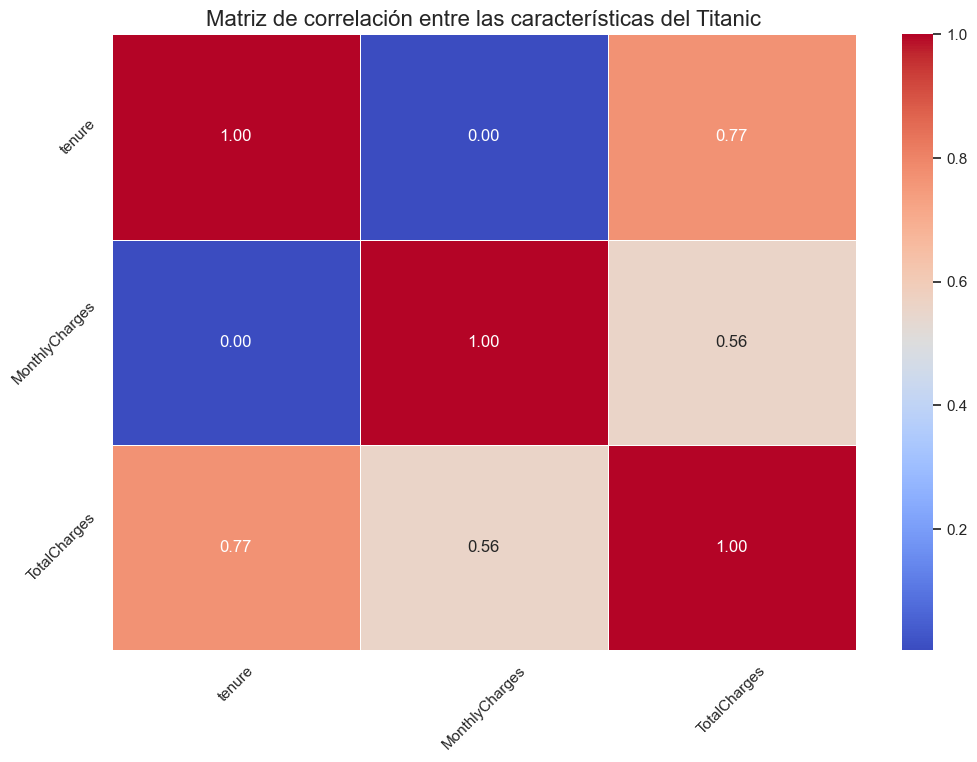

In [44]:

# Seleccionar las columnas para la matriz de correlación
columns_corr = ['tenure','MonthlyCharges','TotalCharges']
matriz_corr = df2[columns_corr].corr()  # Calcula la correlación entre las columnas seleccionadas

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Establecer el estilo de Seaborn
sns.set(style='white')

# Generar el mapa de calor para la matriz de correlación
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Título y ajustes finales
plt.title('Matriz de correlación entre las características del Titanic', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [45]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,CUST0000,1,0,0,1,-0.648040,0,No phone service,No,No internet service,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,CUST0001,0,0,1,0,0.308537,0,No phone service,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CUST0002,1,1,0,0,0.691167,1,No,DSL,No,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,CUST0003,1,1,0,0,1.695572,1,Yes,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CUST0004,1,1,0,0,-0.552382,1,Yes,DSL,No,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Predecir

In [46]:
df2 = df2.drop(columns=['customerID','MultipleLines','OnlineBackup','InternetService','OnlineSecurity',
                        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])

In [47]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,-0.648040,0,1,-0.705078,-0.743650,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,1,0,0.308537,0,0,1.060414,0.923257,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,0,0.691167,1,0,0.943409,1.255078,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,0,1.695572,1,0,1.084023,2.477961,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0,0,-0.552382,1,0,-0.622793,-0.660423,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
# Definir X e y
X = df2.drop(columns=['Churn'])
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
oculta  = tf.keras.layers.Dense(units=128,activation='relu',input_shape=[40])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=64,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
oculta2 = tf.keras.layers.Dense(units=32,activation='relu')
dropout2 = tf.keras.layers.Dropout(0.3)
oculta3 = tf.keras.layers.Dense(units=16,activation='relu')
dropout3 = tf.keras.layers.Dropout(0.3)
oculta4 = tf.keras.layers.Dense(units=8,activation='relu')
dropout4 = tf.keras.layers.Dropout(0.3)
salida = tf.keras.layers.Dense(units=1, activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,oculta2,dropout2,oculta3,oculta4,dropout4,dropout3,salida])

In [50]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [52]:
# Entrenar el modelo
print('Comenzando entrenamiento')
historial = modelo.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=False, validation_split=0.2, callbacks=[early_stopping])
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


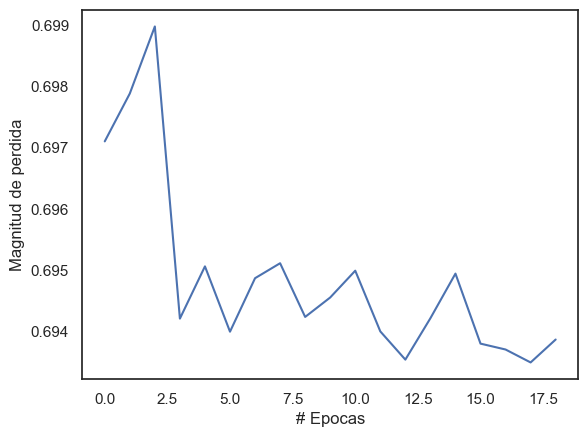

In [53]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [54]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10, 10, 15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :3] = scaler.transform(nuevo_dato[:, :3])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}')

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
El resultado es: 0.48312875628471375


In [55]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

df2['Churn_pred'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(df2.head())

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        0           1 -0.648040             0   
1       0              0        1           0  0.308537             0   
2       1              1        0           0  0.691167             1   
3       1              1        0           0  1.695572             1   
4       1              1        0           0 -0.552382             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -0.705078     -0.743650      0  ...   
1                 0        1.060414      0.923257      1  ...   
2                 0        0.943409      1.255078      1  ...   
3                 0        1.084023      2.477961      0  ...   
4                 0       -0.622793     -0.660423      1  ...   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  1.0                  0.0   
1

In [56]:
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)

# Imprimir el resultado y la predicción
print(f'El resultado es: {prediccion_binaria[0][0]}')
if prediccion_binaria[0][0] == 0:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 0, Abandono')
else:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 1, No abandono')

El resultado es: 0
El resultado es: 0, predicción: 0, Abandono


In [57]:
# Data Real

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [58]:
df3 = df.copy()
df3['Churn_pred'] = predicciones_binarias
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_pred
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No,1
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes,1
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes,0
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No,1
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes,1


In [59]:
churn_1_0 = {'No':0,'Yes':1}
df3['Churn'] = df3['Churn'].map(churn_1_0)
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_pred
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,0,1
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,1,1
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,No,No,One year,No,Electronic check,97.33,4963.83,1,0
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,0,1
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,1,1


In [60]:
# Comparar las predicciones con los valores reales
correct_prediction = (df3['Churn_pred'] == df3['Churn']).sum()

In [61]:
total_predicciones = len(df3)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')

margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

Precisión: 49.29%
Margen de error: 50.71%


In [62]:
df3['Churn'].value_counts()

Churn
0    2982
1    2898
Name: count, dtype: int64

In [63]:
df3['Churn_pred'].value_counts()

Churn_pred
1    4296
0    1584
Name: count, dtype: int64

In [64]:
df3.to_csv('df3.csv',index=False)

# 1. Evaluación

```python

oculta  = tf.keras.layers.Dense(units=64,activation='relu',input_shape=[40])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=64,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
oculta2 = tf.keras.layers.Dense(units=64,activation='relu')
dropout2 = tf.keras.layers.Dropout(0.3)

1000 epochs

40 capas de entrada

3 capas ocultas con 64 neuronas cada una y la función de activación ReLU. ReLU convierte los valores negativos a 0 y deja pasar los valores positivos, ayudando a que las redes neuronales aprendan patrones de mejor manera.

1 dropout es una tecnica que permite regularizar que previene el sobreajuste. Durante el entrenamiento que,
desactiva un porcentaje de las neuronas (0.3 [En este caso, el 30%]), lo que fuerza ala red de no depender demasiado
de ciertas neuronas y aprender caracteristicas más robustas

1 capa de salida con 1 neurona de salida con la funcion 'sigmoid',
la cual interpreta la salida de la ultima capa con un valor entre 0 y 1

**early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)** / El early_stopping

basicamente su función es que al momento de que mi modelo este entrenando si ve que ya no esta aprendiendo, se detiene, en este caso lo configure para 10 epocas, y esto ayuda a evitar el sobreajuste, además captura la mejor versión del modelo antes de detenerse

Precisión: 49.29%
Margen de error: 50.71%

Ya captura el valor entre 0 y 1

# 2. Evaluación

```python

oculta  = tf.keras.layers.Dense(units=64,activation='relu',input_shape=[40])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=64,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
oculta2 = tf.keras.layers.Dense(units=64,activation='relu')
dropout2 = tf.keras.layers.Dropout(0.3)

1000 epochs

40 capas de entrada

3 capas ocultas con 64 neuronas cada una y la función de activación ReLU. ReLU convierte los valores negativos a 0 y deja pasar los valores positivos, ayudando a que las redes neuronales aprendan patrones de mejor manera.

1 dropout es una tecnica que permite regularizar que previene el sobreajuste. Durante el entrenamiento que,
desactiva un porcentaje de las neuronas (0.3 [En este caso, el 30%]), lo que fuerza ala red de no depender demasiado
de ciertas neuronas y aprender caracteristicas más robustas

1 capa de salida con 1 neurona de salida con la funcion 'sigmoid',
la cual interpreta la salida de la ultima capa con un valor entre 0 y 1

historial = modelo.fit(X_train,y_train,epochs=1000,verbose=False,validation_split=0.2,callbacks=[early_stopping]) / Se le agrego el validation_split,
el cual utiliza el 20% de mis datos para la validación y el 80% se utilizaran para entrenar el modelo

**early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)** / El early_stopping

basicamente su función es que al momento de que mi modelo este entrenando si ve que ya no esta aprendiendo, se detiene, en este caso lo configure para 10 epocas, y esto ayuda a evitar el sobreajuste, además captura la mejor versión del modelo antes de detenerse

Precisión: 49.29%
Margen de error: 50.71%

Ya captura el valor entre 0 y 1

# Peso

La fórmula para calcular los pesos de las clases en un problema de clasificación binaria es:

$$
\text{peso}_i = \frac{N}{2 \times N_i}
$$

Donde:
- \( N \) es el número total de muestras.
- \( N_i \) es el número de muestras de la clase \( i \).

### Ejemplo

Supongamos que tienes un conjunto de datos con la siguiente distribución de clases:

- Clase 0: 4091 muestras
- Clase 1: 1789 muestras
- Total de muestras: 5880

Cálculo para la Clase 0:

$$
\text{peso}_0 = \frac{5880}{2 \times 4091} \approx 0.72
$$

Cálculo para la Clase 1:

$$
\text{peso}_1 = \frac{5880}{2 \times 1789} \approx 1.64
$$

### Interpretación

- El peso de la clase "0" (mayoritaria) es aproximadamente 0.72, lo que indica que durante el entrenamiento, las muestras de la clase "0" tendrán menos influencia en la actualización de los parámetros del modelo.
- El peso de la clase "1" (minoritaria) es aproximadamente 1.64, lo que indica que durante el entrenamiento, las muestras de la clase "1" tendrán más influencia en la actualización de los parámetros del modelo.